## 混合高斯模型

1.生成样本，确定要生成的簇的个数

2.初始化u_k, sigma_k

3.do

   {
   
     1）计算后验概率z_ji,
     
     2）更新u_k, sigma_k
     
   }
   
   while(收敛)
   
4.为每个样本输出其最大的后验概率z_ji

## 生成数据

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from scipy.stats import multivariate_normal as m_norm
import matplotlib.pyplot as plt
%matplotlib inline

(1000, 2) (1000,)


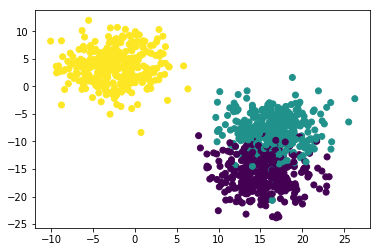

In [2]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=3.0,
                 center_box=(-20, 20.0), random_state=2018)
print(x.shape, y.shape)
plt.scatter(x[:, 0], x[:, 1], c=y)

## 初始化u_k, sigma_k

In [3]:
np.random.seed(1)
k = 3
pi_k = np.array([1/k]*k)
x_index = None
index = np.random.choice(1000, 3)
u_k = x[index]
sig = [[1, 0],
       [0, 1]]
sigma_k = []
for i in range(k):
    sigma_k.append(sig)
sigma_k = np.array(sigma_k)
print(pi_k.shape, u_k.shape, sigma_k.shape)

(3,) (3, 2) (3, 2, 2)


## 迭代更新u_k, sigma_k 和 pi_k

### 计算后验概率z_ji

In [4]:
def get_z(x, pi_k, u_k, sigma_k):
    # get the post probability
    z = []
    n = len(x)
    k = len(pi_k)
    for i in range(n):
        # pi * norm(u, sigma)
        p_ij = [pi_k[j] * m_norm.pdf(x[i], u_k[j], sigma_k[j]) for j in range(k)]
        # normalization
        z_ij = [p/sum(p_ij) for p in p_ij]
        z.append(z_ij)
    z = np.array(z)
    assert z.shape==(n, k), "z.shape error"
    return np.array(z)

### 更新u_k, sigma_k

In [5]:
def update_norm(x, z, u_k, sigma_k):
    # update the u_k, sigma_k according to post probability z
    n = len(x)
    k = len(u_k)
    u_ = np.zeros_like(u_k)
    for j in range(k):
        sig = 0
        u = 0
        for i in range(n):
            u += z[i, j] * x[i]
            
            temp = x[i] - u_k[j]
            temp = temp[:, np.newaxis]
            sig += z[i, j] * np.dot(temp, temp.T)

        u_[j] = u / sum(z[:, j])
        sigma_k[j] = sig / sum(z[:, j])
        assert u_[j].shape==(2, ), "u.shape error"
        assert sigma_k[j].shape==(2, 2), "sigma.shape error"
    return u_, sigma_k

### 更新pi_k

In [6]:
def update_pi(x, z):
    n = len(x)
    k = len(z[0])
    pi_k = [sum(z[:, j]) for j in range(k)]
    pi_k = np.array(pi_k)
    assert pi_k.shape==(k, ), "pi_k.shape error"
    return pi_k

### 迭代更新

In [7]:
def iter_update(x, pi_k, u_k, sigma_k, epoches=100):
    # iterative update
    for i in range(epoches):
        z = get_z(x, pi_k, u_k, sigma_k)
        u_k, sigma_k = update_norm(x, z, u_k, sigma_k)
        pi_k = update_pi(x, z)
    
    # output the highest z_ij
    cluster = np.argmax(z, axis=1)
    return cluster, pi_k, u_k, sigma_k, z

In [8]:
cluster, pi_k, u_k, sigma_k, z = iter_update(x, pi_k, u_k, sigma_k)

## 显示结果
### 以概率显示

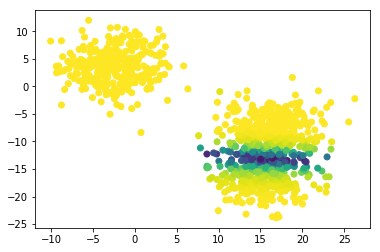

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=np.max(z, axis=1))

### 以聚类结果显示

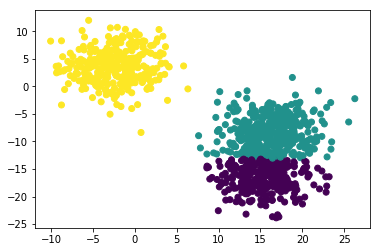

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=cluster)